# Homework 5 RF Accuracy Improvement

This assignment is inspired by examples of Shan-Hung Wu from National Tsing Hua University.

Requirement: improve the accuracy per feature of the following code from 0.03 up to at least 0.40 and accuracy should be more than 0.92

Here are three hints:

    You can improve the ratio by picking out or "creating" several features.
    Tune hyperparameters
    The ratio can be improved from 0.03 up to 0.47.

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import seaborn as sns

# load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)

print(X.shape)

# TODO Select some features (X), hint: based on the connections with
# our Y (importance? correlation?)
# TODO need 5 fold cross validation
# TODO Tune parameters for RandomForestClassifier
# TODO Calculate Average accuracy score
# TODO Calculate Average (accuracy score/number of features)

(569, 30)


In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [254]:
Forest = RandomForestClassifier(criterion='entropy',n_estimators=200,random_state=1,n_jobs=2)
Forest.fit(X_train, y_train)
y_pred = Forest.predict(X_test)

In [255]:
model = SelectFromModel(Forest, threshold=0.1176) 
model.fit(X_train, y_train)
X_train_imp = model.transform(X_train)
X_test_imp = model.transform(X_test)

In [256]:
forest_imp = RandomForestClassifier(criterion = 'entropy', n_estimators=200, random_state=1, n_jobs=2, max_depth=1)
forest_imp.fit(X_train_imp, y_train)

RandomForestClassifier(criterion='entropy', max_depth=1, n_estimators=200,
                       n_jobs=2, random_state=1)

In [257]:
y_pred_imp = forest_imp.predict(X_test_imp)

In [282]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_imp))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred_imp)/X_test_imp.shape[1]))

Accuracy: 0.92
Accuracy per feature: 0.46


<AxesSubplot:>

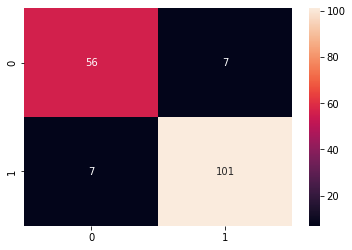

In [283]:
cm = confusion_matrix(y_test,forest_imp.predict(X_test_imp))
sns.heatmap(cm,annot=True,fmt="d")